In [4]:
import cv2

from sklearn.datasets import make_blobs

X_data, y_data = make_blobs(n_samples =100, centers = 2, cluster_std = 5.1, random_state = 30)

In [6]:
y_data

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [8]:
import numpy 

X = X_data.astype(numpy.float32)

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, dtype = numpy.float32)

encoder

OneHotEncoder(dtype=<class 'numpy.float32'>, sparse=False)

In [10]:
y = encoder.fit_transform(y_data.reshape(-1,1))
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [12]:
model = cv2.ml.ANN_MLP_create()

number_of_inputs = 2

number_of_hidden_layers = 8

number_of_outputs = 2

model.setLayerSizes(numpy.array([number_of_inputs,number_of_hidden_layers,number_of_outputs]))

alpha = 2.5

beta = 1

model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, alpha, beta)

model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)

termination_mode = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS

maximum_iterations = 200

minimum_accuracy = 0.01

model.setTermCriteria((termination_mode, maximum_iterations ,minimum_accuracy))

model.train(X,cv2.ml.ROW_SAMPLE,y)

True

In [14]:
ret, prediction = model.predict(X)

In [15]:
prediction

array([[ 1.0160214e+00, -1.6990503e-02],
       [ 1.0227072e+00, -2.3148017e-02],
       [-2.7410332e-03,  9.5952195e-01],
       [ 9.3378115e-01,  5.1031433e-02],
       [ 7.8911924e-01,  1.7332414e-01],
       [ 7.7714843e-01,  1.8526451e-01],
       [ 1.0254002e+00, -2.4742346e-02],
       [ 1.0135471e+00, -1.7102038e-02],
       [ 1.1448317e-02,  8.5115504e-01],
       [ 1.4382549e-02,  9.7566390e-01],
       [ 6.6585871e-03,  9.4031411e-01],
       [ 1.0256531e+00, -2.5593469e-02],
       [ 8.0461937e-01,  1.6014341e-01],
       [ 3.5507813e-01,  4.2654130e-01],
       [ 1.0249093e+00, -2.4765871e-02],
       [ 1.0255178e+00, -2.5398247e-02],
       [ 1.0231586e+00, -2.3720684e-02],
       [ 7.8507715e-01,  1.4417568e-01],
       [ 1.0251139e+00, -2.4299303e-02],
       [ 1.0025769e+00, -8.5468246e-03],
       [ 1.0227066e+00, -2.2391379e-02],
       [ 1.0252554e+00, -2.5152646e-02],
       [ 1.0250814e+00, -2.4265613e-02],
       [ 6.4431971e-01,  2.8853184e-01],
       [ 1.02549

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(prediction.round(),y)

0.61

In [18]:
from matplotlib import pyplot

In [31]:
def scatterplot(model,X,y):
  pyplot.scatter(X[:,0], X[:,1], c=y)

def visualize_results(model,X,y):

  

  h = 0.02
  min_x, max_x = X[:,0].min() -1, X[:,0].max() + 1
  min_y, max_y = X[:,1].min() -1, X[:,1].max() + 1

  new_x,new_y = numpy.meshgrid(numpy.arange(min_x,max_x,h),numpy.arange(min_y,max_y,h))
  
  x_hypothesis = numpy.c_[new_x.ravel().astype(numpy.float32),new_y.ravel().astype(numpy.float32)]

  ret, z = model.predict(x_hypothesis)

  z = numpy.argmax(z, axis = 1) 
  z = z.reshape(new_x.shape)

  pyplot.contourf(new_x,new_y, z)


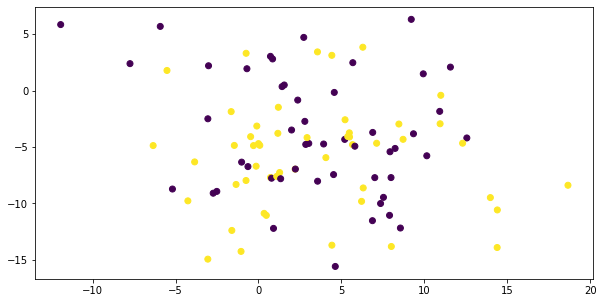

In [30]:
scatterplot(model,X,y_data)

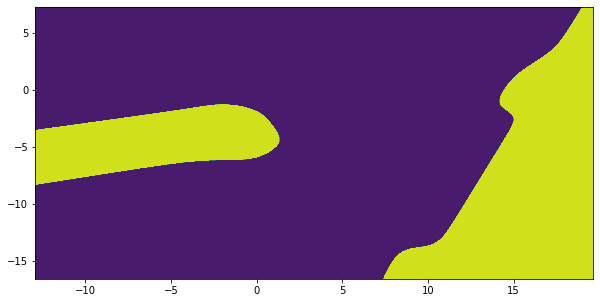

In [32]:
pyplot.rcParams["figure.figsize"] = (10,5)
visualize_results(model,X,y_data)